In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
results_dir = Path("../reports/ZINC20_compression/")

In [3]:
df_list = []
for file in results_dir.glob("*dask*.csv"):
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)
df = pd.concat(df_list, ignore_index=True)

In [4]:
df.columns

Index(['compression_algorithm', 'compression_level', 'blocksize', 'duration',
       'input_size', 'output_size', 'compression_ratio', 'report_path'],
      dtype='object')

([<matplotlib.axis.XTick at 0x77a53087ae40>,
 [Text(0, 0, 'brotli'),
  Text(1, 0, 'gzip'),
  Text(2, 0, 'lz4'),
  Text(3, 0, 'snappy'),
  Text(4, 0, 'zstd')])

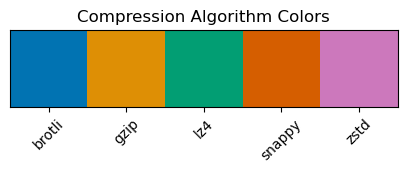

In [5]:
# Create a color palette for compression algorithms
algorithms = df["compression_algorithm"].unique()
unique_algorithms = sorted(set(algorithms))
palette = sns.color_palette("colorblind", n_colors=len(unique_algorithms))

# Create a dictionary mapping each algorithm to a color
algorithm_colors = dict(zip(unique_algorithms, palette))

# Display the color palette
sns.palplot(palette)
plt.title("Compression Algorithm Colors")
plt.xticks(ticks=range(len(unique_algorithms)), labels=unique_algorithms, rotation=45)

In [6]:
min_duration = df["duration"].min()
df[df["duration"] == min_duration]

,compression_algorithm,compression_level,blocksize,duration,input_size,output_size,compression_ratio,report_path
1,snappy,NaN,32MB,120.108141,47406986871,25934581123,1.827945,../reports/ZINC20_compression/snappy/ZINC20_dr...


In [7]:
figures_dir = Path("../figures/ZINC20_compression/")
figures_dir.mkdir(parents=True, exist_ok=True)

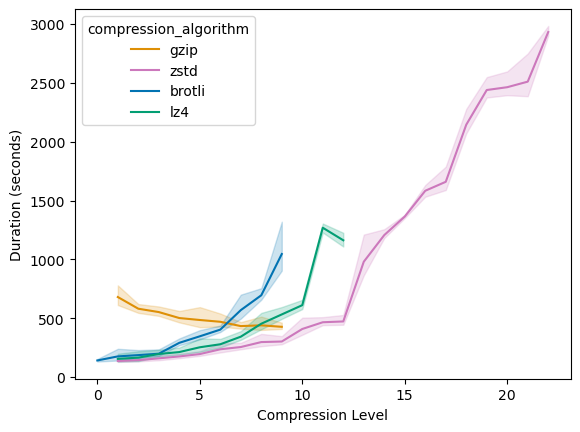

In [8]:
# Plotting the duration vs  compression levels
ax = sns.lineplot(
    data=df[(df["compression_algorithm"] != "snappy") & ~((df["compression_algorithm"] == "brotli") & (df["compression_level"] > 9))],
    x="compression_level",
    y="duration",
    hue="compression_algorithm",
    palette=algorithm_colors,
)

ax.set_xlabel("Compression Level")
ax.set_ylabel("Duration (seconds)")
plt.savefig(figures_dir / "duration_compression_dask_level.svg", format="svg", bbox_inches="tight")
plt.show()

In [9]:
df.groupby(["compression_algorithm"])["duration"].describe()

,count,mean,std,min,25%,50%,75%,max
compression_algorithm,,,,,,,,
brotli,36.0,1800.214053,3352.545517,132.264445,217.563972,386.187802,792.882968,12846.052356
gzip,27.0,507.994826,94.445101,400.596138,426.869987,478.903027,569.300439,779.522247
lz4,36.0,469.543550,369.762160,131.446093,210.209124,323.906852,582.469042,1305.237855
snappy,3.0,129.452420,10.697469,120.108141,123.618165,127.128189,134.124559,141.120928
zstd,66.0,1024.463930,939.686958,128.934185,224.871324,476.073703,1656.783792,2984.479487


In [10]:
df.groupby(["compression_algorithm"])["compression_ratio"].describe()

,count,mean,std,min,25%,50%,75%,max
compression_algorithm,,,,,,,,
brotli,36.0,3.287675,0.475997,2.268152,2.967202,3.394210,3.631504,4.145459
gzip,27.0,3.011141,0.176324,2.581920,2.925659,3.005519,3.163439,3.232752
lz4,36.0,2.303968,0.233199,1.707531,2.182059,2.371226,2.475401,2.586507
snappy,3.0,1.815006,0.042210,1.767841,1.797893,1.827945,1.838589,1.849233
zstd,66.0,3.516509,0.372327,2.799970,3.199024,3.494568,3.778530,4.140634


In [11]:
df[df["compression_algorithm"] == "brotli"]

,compression_algorithm,compression_level,blocksize,duration,input_size,output_size,compression_ratio,report_path
96,brotli,0.0,16MB,138.041258,47406986871,20901149259,2.268152,../reports/ZINC20_compression/brotli/ZINC20_dr...
97,brotli,0.0,32MB,132.264445,47406986871,20009986533,2.369166,../reports/ZINC20_compression/brotli/ZINC20_dr...
98,brotli,0.0,64MB,153.892720,47406986871,19707852949,2.405487,../reports/ZINC20_compression/brotli/ZINC20_dr...
99,brotli,1.0,16MB,146.090926,47406986871,18336570769,2.585379,../reports/ZINC20_compression/brotli/ZINC20_dr...
100,brotli,1.0,32MB,141.005669,47406986871,17478607943,2.712286,../reports/ZINC20_compression/brotli/ZINC20_dr...
101,brotli,1.0,64MB,240.612987,47406986871,17188648365,2.758040,../reports/ZINC20_compression/brotli/ZINC20_dr...
102,brotli,2.0,16MB,167.373972,47406986871,17006882976,2.787518,../reports/ZINC20_compression/brotli/ZINC20_dr...
103,brotli,2.0,32MB,163.165426,47406986871,16135381746,2.938077,../reports/ZINC20_compression/brotli/ZINC20_dr...
104,brotli,2.0,64MB,229.828296,47406986871,15840475475,2.992775,../reports/ZINC20_compression/brotli/ZINC20_dr...
105,brotli,3.0,16MB,180.771001,47406986871,16795728979,2.822562,../reports/ZINC20_compression/brotli/ZINC20_dr...


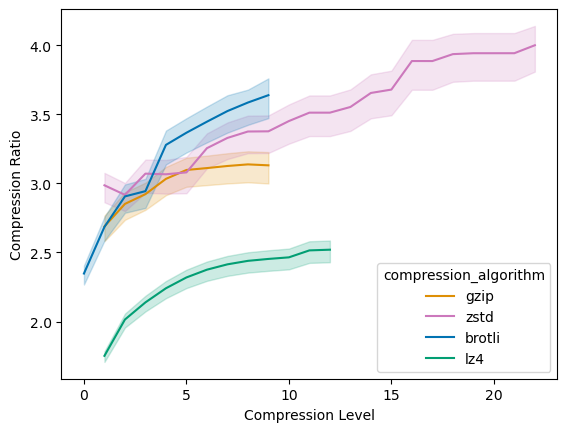

In [12]:
# Plotting the compression ratio vs compression levels
ax = sns.lineplot(
    data=df[(df["compression_algorithm"] != "snappy") & ~((df["compression_algorithm"] == "brotli") & (df["compression_level"] > 9))],
    x="compression_level",
    y="compression_ratio",
    hue="compression_algorithm",
    palette=algorithm_colors,
)

ax.set_xlabel("Compression Level")
ax.set_ylabel("Compression Ratio")
plt.savefig(figures_dir / "compression_ratio_level_dask.svg", format="svg", bbox_inches="tight")
plt.show()

In [13]:
df_list = []
for file in results_dir.glob("*pyarrow*.csv"):
    temp_df = pd.read_csv(file)
    df_list.append(temp_df)
df_pyarrow = pd.concat(df_list, ignore_index=True)

In [14]:
df_pyarrow.rename(columns={"compression": "compression_algorithm"}, inplace=True)

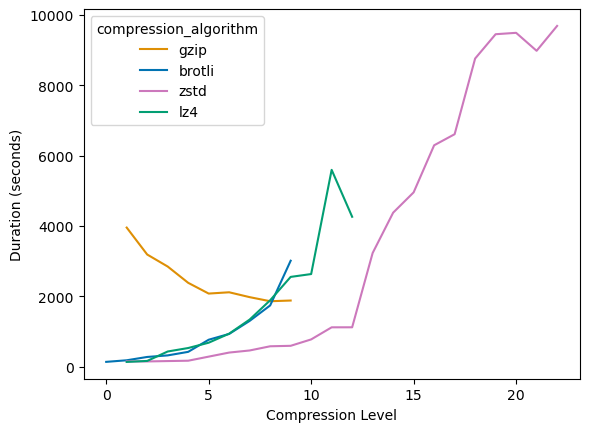

In [15]:
# Plotting the duration vs compression levels
ax = sns.lineplot(
    data=df_pyarrow[
        (df_pyarrow["compression_algorithm"] != "snappy")
        & ~((df_pyarrow["compression_algorithm"] == "brotli") & (df_pyarrow["compression_level"] > 9))
    ],
    x="compression_level",
    y="duration",
    hue="compression_algorithm",
    palette=algorithm_colors,
)

ax.set_xlabel("Compression Level")
ax.set_ylabel("Duration (seconds)")
plt.savefig(figures_dir / "duration_compression_pyarrow_level.svg", format="svg", bbox_inches="tight")
plt.show()

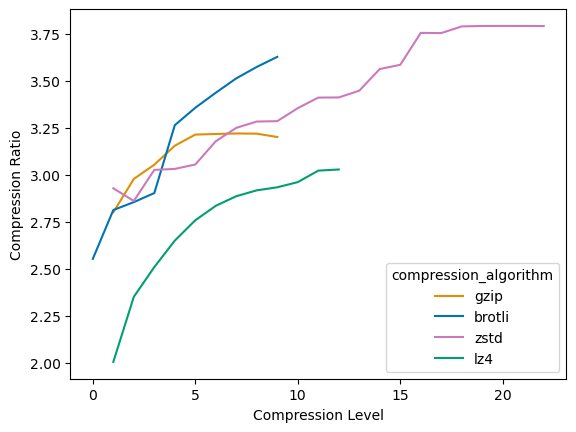

In [16]:
# Plotting the compression ratio vs compression levels
ax = sns.lineplot(
    data=df_pyarrow[
        (df_pyarrow["compression_algorithm"] != "snappy")
        & ~((df_pyarrow["compression_algorithm"] == "brotli") & (df_pyarrow["compression_level"] > 9))
    ],
    x="compression_level",
    y="compression_ratio",
    hue="compression_algorithm",
    palette=algorithm_colors,
)

ax.set_xlabel("Compression Level")
ax.set_ylabel("Compression Ratio")
plt.savefig(figures_dir / "compression_ratio_pyarrow_level.svg", format="svg", bbox_inches="tight")
plt.show()

In [17]:
serial_gzip_results = pd.read_csv(results_dir / "benchmark_results_text_gzip.csv")

In [18]:
serial_gzip_results.rename(columns={"compression": "compression_algorithm"}, inplace=True)

In [19]:
serial_gzip_results["n_workers"] = 1

In [20]:
mp_gzip_results = pd.read_csv(results_dir / "benchmark_results_text_parralel_gzip.csv")

In [21]:
mp_gzip_results

,compression,compression_level,duration,input_size,output_size,compression_ratio,nb_workers
0,gzip,1,132.882822,47406986871,17780155520,2.666286,4
1,gzip,1,94.683028,47406986871,17780155520,2.666286,8
2,gzip,1,75.504199,47406986871,17780155520,2.666286,16
3,gzip,2,155.527615,47406986871,16780669009,2.825095,4
4,gzip,2,108.605631,47406986871,16780669009,2.825095,8
5,gzip,2,86.679681,47406986871,16780669009,2.825095,16
6,gzip,3,229.287911,47406986871,15559722139,3.046776,4
7,gzip,3,164.305439,47406986871,15559722139,3.046776,8
8,gzip,3,130.722654,47406986871,15559722139,3.046776,16
9,gzip,4,210.578252,47406986871,15163302494,3.126429,4


In [22]:
gzip_total_df = pd.concat([serial_gzip_results, mp_gzip_results], ignore_index=True)

In [23]:
# Group by compression_algorithm and compression_level, then compute mean and std for compression_ratio
compression_stats = df.groupby(["compression_algorithm", "compression_level"])["compression_ratio"].agg(["mean", "std"]).reset_index()

# Replace NaN values in std with 0 (for cases where only one entry exists for a group)
compression_stats["std"] = compression_stats["std"].fillna(0)

# Sort by algorithm and compression level
compression_stats = compression_stats.sort_values(["compression_algorithm", "compression_level"])

# Display the results
print("Compression ratio statistics per algorithm and level:")
compression_stats

Compression ratio statistics per algorithm and level:


,compression_algorithm,compression_level,mean,std
0,brotli,0.0,2.347602,0.071162
1,brotli,1.0,2.685235,0.089453
2,brotli,2.0,2.906123,0.106294
3,brotli,3.0,2.944153,0.108969
4,brotli,4.0,3.279098,0.126935
5,brotli,5.0,3.367229,0.128557
6,brotli,6.0,3.447065,0.134467
7,brotli,7.0,3.524031,0.140220
8,brotli,8.0,3.585863,0.144924
9,brotli,9.0,3.639116,0.148987


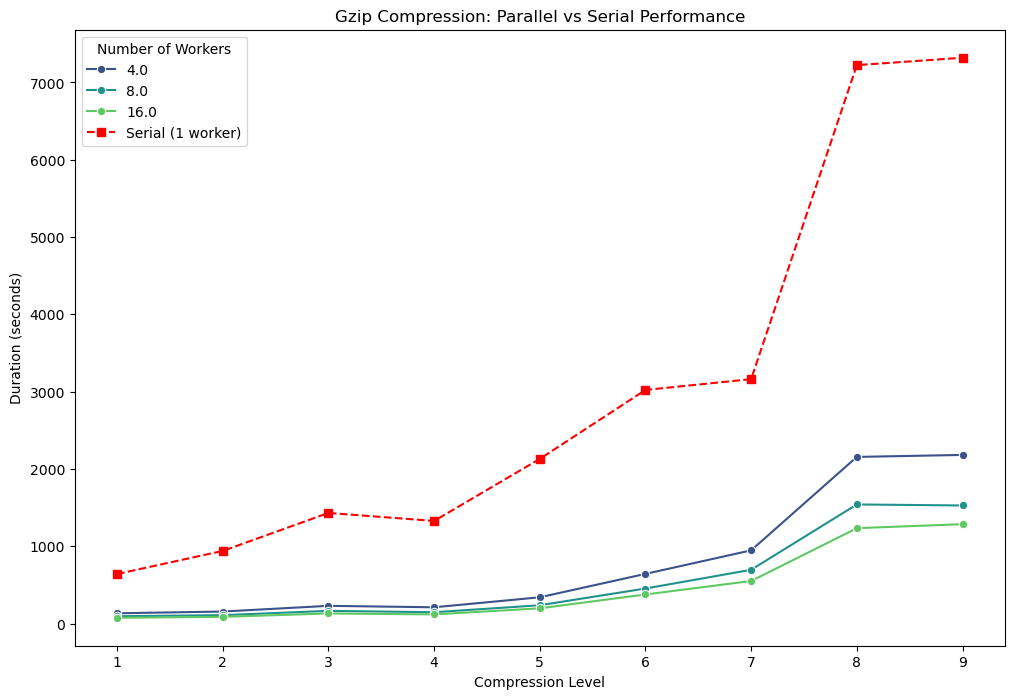

In [24]:
# Create a plot comparing parallel gzip compression performance
plt.figure(figsize=(12, 8))

# Filter out the serial data (which doesn't have nb_workers)
mp_data = gzip_total_df.dropna(subset=["nb_workers"])

# Create a color palette for different numbers of workers
worker_counts = sorted(mp_data["nb_workers"].unique())
worker_palette = sns.color_palette("viridis", n_colors=len(worker_counts))

# Plot the data
ax = sns.lineplot(data=mp_data, x="compression_level", y="duration", hue="nb_workers", marker="o", palette=worker_palette)

# Add the serial data as a separate line
serial_data = gzip_total_df[gzip_total_df["n_workers"] == 1]
ax.plot(serial_data["compression_level"], serial_data["duration"], marker="s", linestyle="--", color="red", label="Serial (1 worker)")

# Set labels and title
ax.set_xlabel("Compression Level")
ax.set_ylabel("Duration (seconds)")
ax.set_title("Gzip Compression: Parallel vs Serial Performance")

# Improve the legend
ax.legend(title="Number of Workers")

# Save the figure
plt.savefig(figures_dir / "gzip_parallel_performance.svg", format="svg", bbox_inches="tight")

plt.show()